In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/News Dataset /news_classification (1).csv')
data = data.dropna()
data.head()

headline   category newspaper name
0    হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!  Amusement       Jugantor
1               এত দামি জুতা পরেন প্রিয়াঙ্কা!  Amusement       Jugantor
2             মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও  Amusement       Jugantor
3    কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি  Amusement       Jugantor
4  বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা  Amusement       Jugantor

In [ ]:
data.shape

(136805, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136805 entries, 0 to 136810
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   headline        136805 non-null  object
 1   category        136805 non-null  object
 2   newspaper name  136805 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


In [ ]:
data.category.value_counts()

International    48812
sports           33172
national         24935
Amusement        16491
politics         10589
IT                2806
Name: category, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def calc_gram_tfidf(headline,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(category,bool):
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in range(15000):
            
            if encoded_labels[i] == 21:
              print(encoded_labels[i],"->>" ,category[i])

    return labels

In [ ]:
def dataset_split(feature_space,category):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,train_size = 0.8,
                                                  test_size = 0.2,random_state =458)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
tfidf,feature = calc_gram_tfidf(data.headline,(1,1))
labels = label_encoding(data.category,True)
X_train,X_test,y_train,y_test = dataset_split(feature,labels)


			===== Label Encoding ===== 
Class Names:--> ['Amusement' 'IT' 'International' 'national' 'politics' 'sports']
Feature Size :======> 80815

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136805 
	Training		 109444 
	Test			 27361


In [ ]:
labels

array([0, 0, 0, ..., 3, 3, 3])

# Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter= 400, random_state = 123)
lr_model.fit(X_train,y_train)
pred_y = lr_model.predict(X_test)

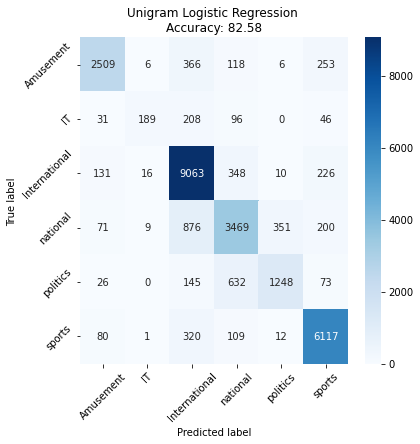

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Unigram Logistic Regression \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

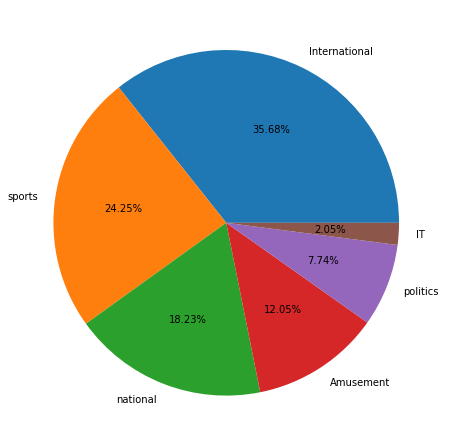

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

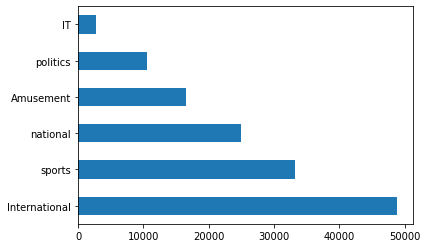

In [ ]:
data['category'].value_counts().plot(kind='barh');

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'national','4':'politics','5':'sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

precision  recall  f1-score      support
Amusement          88.10   77.01     82.18   3258.00000
IT                 85.52   33.16     47.79    570.00000
International      82.56   92.54     87.26   9794.00000
national           72.69   69.71     71.17   4976.00000
politics           76.71   58.76     66.54   2124.00000
sports             88.46   92.14     90.26   6639.00000
accuracy           82.58   82.58     82.58      0.82581
macro avg          82.34   70.55     74.20  27361.00000
weighted avg       82.46   82.58     82.03  27361.00000

In [ ]:
def generateROC(model):
    from sklearn.metrics import RocCurveDisplay
    from sklearn.preprocessing import LabelBinarizer
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = ["tomato", "aqua","crimson","darkorange", "cornflowerblue","blue"]
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_score = model.fit(X_train,y_train).predict_proba(X_test)
    for label in np.unique(y_train):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, label],
            y_score[:, label],
            name=f"{label} vs the rest",
            color=colors[label],
            ax=ax
        )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"One-vs-Rest ROC curves({type(model).__name__}):")
    plt.legend()
    plt.show()

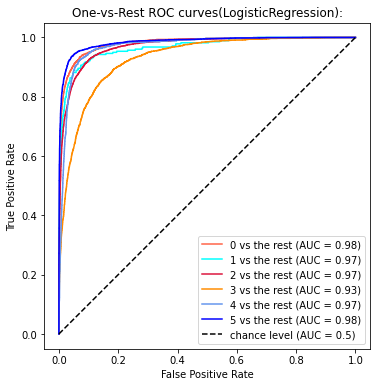

In [ ]:
generateROC(lr_model)

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
pred_y = dt_model.predict(X_test)


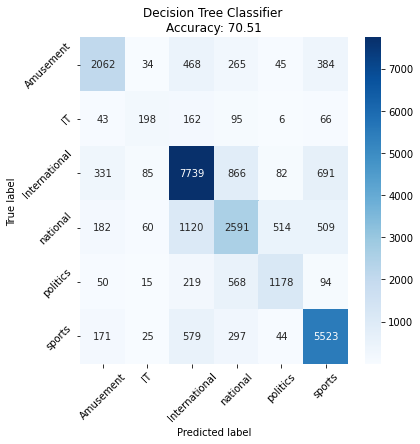

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Decision Tree Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

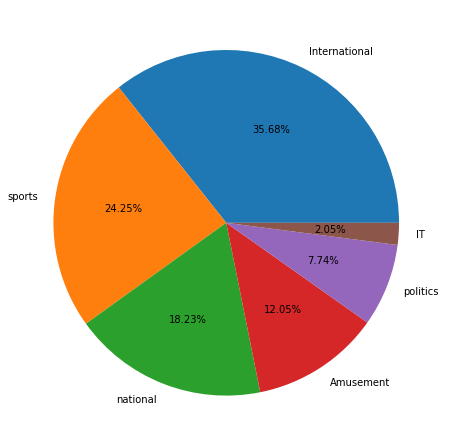

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

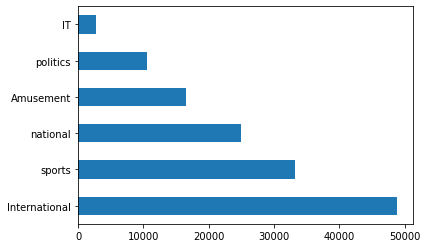

In [ ]:
data['category'].value_counts().plot(kind='barh');

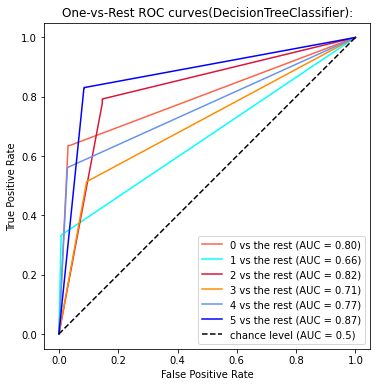

In [ ]:
generateROC(dt_model)

# Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
pred_y = rf_model.predict(X_test)

In [ ]:
import torch

In [ ]:
dml = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dml

device(type='cuda', index=0)

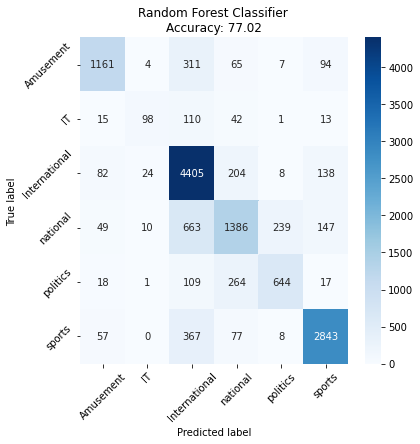

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Random Forest Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
data['category'].value_counts().plot(kind='barh');

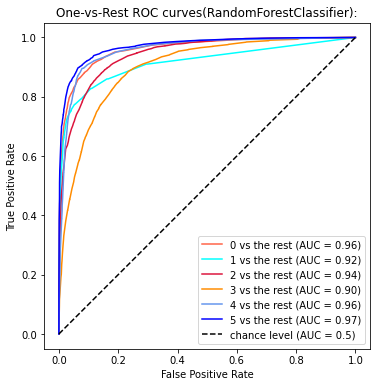

In [ ]:
generateROC(rf_model)

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'national','4':'politics','5':'sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

precision  recall  f1-score       support
Amusement          84.01   70.71     76.79   1642.000000
IT                 71.53   35.13     47.12    279.000000
International      73.85   90.62     81.38   4861.000000
national           68.01   55.57     61.17   2494.000000
politics           71.00   61.16     65.71   1053.000000
sports             87.42   84.82     86.10   3352.000000
accuracy           77.02   77.02     77.02      0.770192
macro avg          75.97   66.33     69.71  13681.000000
weighted avg       77.06   77.02     76.39  13681.000000

# KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
pred_y = knn_model.predict(X_test)

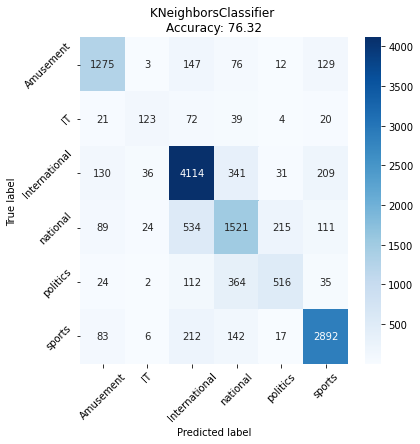

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('KNeighborsClassifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
data['category'].value_counts().plot(kind='barh');

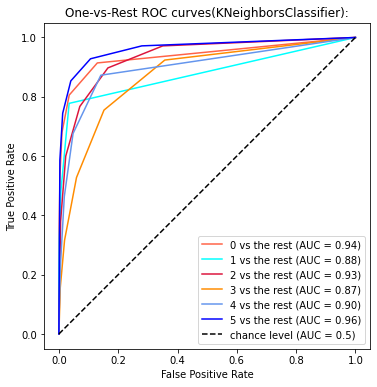

In [ ]:
generateROC(knn_model)

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'national','4':'politics','5':'sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

precision  recall  f1-score       support
Amusement          78.61   77.65     78.12   1642.000000
IT                 63.40   44.09     52.01    279.000000
International      79.25   84.63     81.85   4861.000000
national           61.26   60.99     61.12   2494.000000
politics           64.91   49.00     55.84   1053.000000
sports             85.16   86.28     85.71   3352.000000
accuracy           76.32   76.32     76.32      0.763175
macro avg          72.10   67.11     69.11  13681.000000
weighted avg       75.91   76.32     75.96  13681.000000

# Naive Bayes

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
pred_y = mnb_model.predict(X_test)

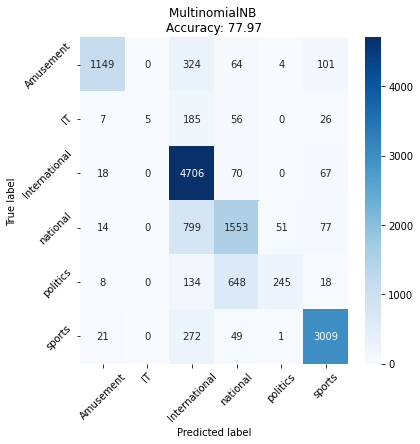

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('MultinomialNB \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
data['category'].value_counts().plot(kind='barh');

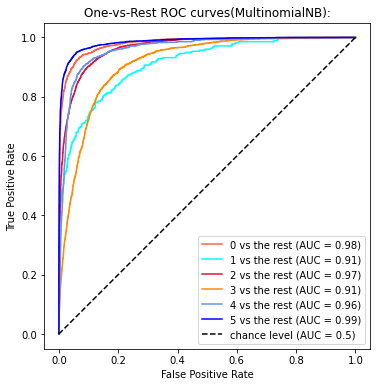

In [ ]:
generateROC(mnb_model)

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'national','4':'politics','5':'sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

precision  recall  f1-score       support
Amusement          94.41   69.98     80.38   1642.000000
IT                100.00    1.79      3.52    279.000000
International      73.30   96.81     83.43   4861.000000
national           63.65   62.27     62.95   2494.000000
politics           81.40   23.27     36.19   1053.000000
sports             91.24   89.77     90.50   3352.000000
accuracy           77.97   77.97     77.97      0.779694
macro avg          84.00   57.31     59.49  13681.000000
weighted avg       79.64   77.97     75.80  13681.000000

# SVM

In [ ]:
from sklearn.svm import SVC



# Step 5: Initialize the SVM model
svm_model = SVC(kernel='linear')

# Step 6: Fit the model on the training data
svm_model.fit(X_train,y_train)

# Step 7: Predict the category of the test data using the trained model
pred_y = svm_model.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement','IT', 'International', 'national', 'politics', 'sports'], 
                     columns = ['Amusement','IT', 'International', 'national', 'politics', 'sports'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('MultinomialNB \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data['category'].value_counts().values, 
       labels = data['category'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
data['category'].value_counts().plot(kind='barh');

AttributeError: ignored

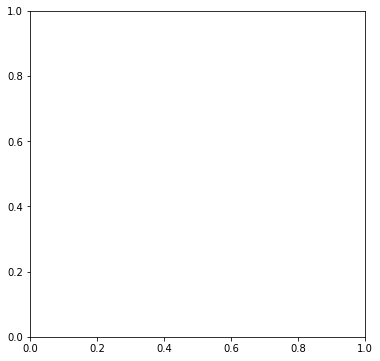

In [ ]:
generateROC(svm_model)

In [ ]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'national','4':'politics','5':'sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

precision  recall  f1-score       support
Amusement          87.61   81.15     84.26   3258.000000
IT                 77.45   50.00     60.77    570.000000
International      84.26   91.98     87.95   9794.000000
national           73.48   70.66     72.04   4976.000000
politics           75.01   65.16     69.74   2124.000000
sports             91.76   91.96     91.86   6639.000000
accuracy           83.85   83.85     83.85      0.838529
macro avg          81.59   75.15     77.77  27361.000000
weighted avg       83.66   83.85     83.59  27361.000000